In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jnagura/Energy-consumption-prediction-analysis/master/PJM_Load_hourly.csv')
df.columns = ['ds', 'y']
df.insert(0, 'unique_id', 'PJM_Load_hourly')
df.tail()

,unique_id,ds,y
32891,PJM_Load_hourly,2001-01-01 20:00:00,35209.0
32892,PJM_Load_hourly,2001-01-01 21:00:00,34791.0
32893,PJM_Load_hourly,2001-01-01 22:00:00,33669.0
32894,PJM_Load_hourly,2001-01-01 23:00:00,31809.0
32895,PJM_Load_hourly,2001-01-02 00:00:00,29506.0


In [3]:
df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)


In [4]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

/opt/anaconda3/lib/python3.8/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA

In [6]:
# Create a list of models and instantiation parameters

models = [MSTL(
    season_length=[24, 24 * 7], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

In [7]:
sf = StatsForecast(
    models=models, # model used to fit each time series 
    freq='H', # frequency of the data
)

In [8]:
sf = sf.fit(df=df)

In [9]:
sf.fitted_[0, 0].model_

,data,trend,seasonal24,seasonal168,remainder
0,22259.0,26183.898892,-5215.124554,609.000432,681.225229
1,21244.0,26181.599305,-6255.673234,603.823918,714.250011
2,20651.0,26179.294886,-6905.329895,636.820423,740.214587
3,20421.0,26176.985472,-7073.420118,615.825999,701.608647
4,20713.0,26174.670877,-7062.395760,991.521912,609.202971
...,...,...,...,...,...
32891,36392.0,33123.552727,4387.149171,-488.177882,-630.524015
32892,35082.0,33148.242575,3479.852929,-682.928737,-863.166767
32893,33890.0,33172.926165,2307.808829,-650.566775,-940.168219
32894,32590.0,33197.603322,748.587723,-555.177849,-801.013195


In [10]:
import matplotlib.pyplot as plt

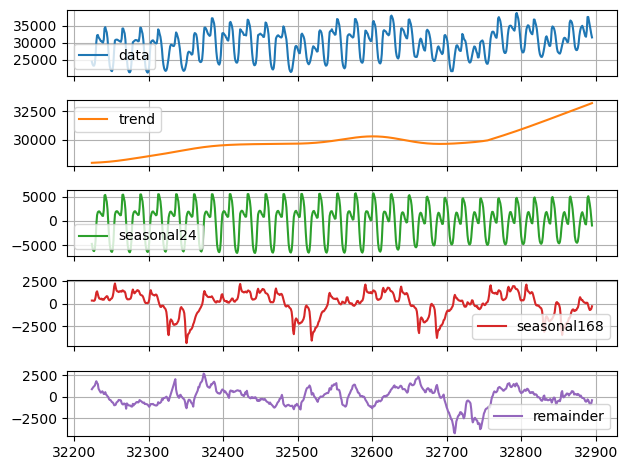

In [11]:
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

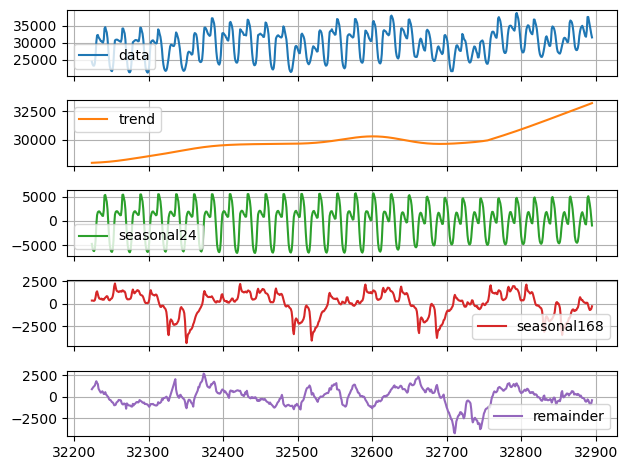

In [12]:
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

In [14]:
forecasts = sf.predict(h=24, level=[90])
forecasts.head()
sf.plot(df, forecasts, max_insample_length=24 * 7)